# Practical example

## Importing the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Loading the raw data

In [2]:
raw_data = pd.read_csv('Delhi houses_2')
raw_data.head()

,index,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Lift,type_of_building,Price_sqft
0,0,5600000,"Noida Extension, Noida, Delhi NCR",1350,28.608850,77.460560,3,3,0.0,Under Construction,New Property,0.0,2.0,Flat,4148.148148
1,1,8800000,"Sector 79, Gurgaon, Delhi NCR",1490,28.374236,76.952416,3,3,0.0,Ready to Move,New Property,0.0,2.0,Flat,5906.040268
2,2,16500000,"Vaishali, Ghaziabad, Delhi NCR",2385,28.645769,77.385110,4,5,0.0,Ready to Move,New Property,1.0,0.0,Flat,6918.238994
3,4,6200000,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350,28.520732,77.356491,2,2,3.0,Ready to Move,Resale,1.0,3.0,Flat,4592.592593
4,5,3700000,"tower 2, 6th floor, Crossings Republik, Ghazia...",1150,28.628040,77.437809,2,2,3.0,Ready to Move,New Property,0.0,0.0,Flat,3217.391304


## Preprocessing

### Exploring the descriptive statistics of the variables

In [3]:
raw_data.describe(include='all')

,index,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Lift,type_of_building,Price_sqft
count,7164.000000,7.164000e+03,7164,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164,7164,7164.000000,7164.000000,7164,7164.000000
unique,NaN,NaN,3951,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,NaN
top,NaN,NaN,"Raj Nagar Extension, Ghaziabad, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN,Ready to Move,Resale,NaN,NaN,Flat,NaN
freq,NaN,NaN,158,NaN,NaN,NaN,NaN,NaN,NaN,7148,6417,NaN,NaN,5752,NaN
mean,3858.070910,8.366277e+06,NaN,1409.535176,28.555818,77.274783,2.713428,2.501256,1.627164,NaN,NaN,2.488414,0.413037,NaN,5576.523738
std,2234.456734,7.307573e+06,NaN,722.713312,0.106311,0.177935,0.888654,0.870587,1.431929,NaN,NaN,33.328259,0.947367,NaN,2450.383249
min,0.000000,1.700000e+06,NaN,501.000000,28.240023,76.902820,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,2100.000000
25%,1920.750000,4.200000e+06,NaN,988.000000,28.462563,77.083284,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,3961.113503
50%,3854.500000,6.000000e+06,NaN,1250.000000,28.577868,77.344376,3.000000,2.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,4988.373656
75%,5795.250000,9.500000e+06,NaN,1650.000000,28.643642,77.417028,3.000000,3.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,6379.043583


### Determining the variables of interest

In [4]:
columns_to_drop = ['index','Address']
data = raw_data.drop(columns_to_drop,axis=1)

### Dealing with missing values

In [5]:
data.isnull().sum()

price               0
area                0
latitude            0
longitude           0
Bedrooms            0
Bathrooms           0
Balcony             0
Status              0
neworold            0
parking             0
Lift                0
type_of_building    0
Price_sqft          0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.describe(include='all')

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Lift,type_of_building,Price_sqft
count,7.164000e+03,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164.000000,7164,7164,7164.000000,7164.000000,7164,7164.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ready to Move,Resale,NaN,NaN,Flat,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7148,6417,NaN,NaN,5752,NaN
mean,8.366277e+06,1409.535176,28.555818,77.274783,2.713428,2.501256,1.627164,NaN,NaN,2.488414,0.413037,NaN,5576.523738
std,7.307573e+06,722.713312,0.106311,0.177935,0.888654,0.870587,1.431929,NaN,NaN,33.328259,0.947367,NaN,2450.383249
min,1.700000e+06,501.000000,28.240023,76.902820,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,2100.000000
25%,4.200000e+06,988.000000,28.462563,77.083284,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,3961.113503
50%,6.000000e+06,1250.000000,28.577868,77.344376,3.000000,2.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,4988.373656
75%,9.500000e+06,1650.000000,28.643642,77.417028,3.000000,3.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,6379.043583


### Exploring the PDFs

C:\Users\HP\AppData\Local\Temp\ipykernel_22700\2371654331.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_no_mv['price'])


<AxesSubplot: xlabel='price', ylabel='Density'>

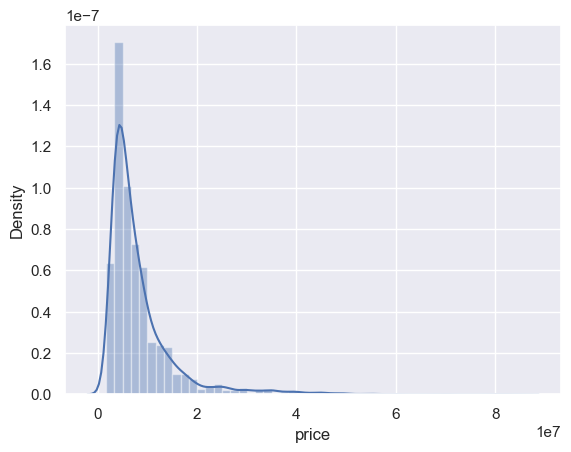

In [8]:
sns.distplot(data_no_mv['price'])

### Dealing with outliers

In [9]:
q = data_no_mv['price'].quantile(0.9)
data_1 = data_no_mv[data_no_mv['price']<q]
data_1.describe(include='all')

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Lift,type_of_building,Price_sqft
count,6.368000e+03,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368.000000,6368,6368,6368.000000,6368.000000,6368,6368.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ready to Move,Resale,NaN,NaN,Flat,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6357,5758,NaN,NaN,5137,NaN
mean,6.354666e+06,1245.599560,28.561414,77.291288,2.566583,2.331972,1.548367,NaN,NaN,2.612751,0.378298,NaN,5085.311287
std,2.945009e+06,398.222779,0.106292,0.176589,0.705135,0.608072,1.379419,NaN,NaN,35.276193,0.915607,NaN,1741.868248
min,1.700000e+06,501.000000,28.240023,76.902820,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,2100.000000
25%,4.000000e+06,950.000000,28.472907,77.098386,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,3846.153846
50%,5.500000e+06,1178.000000,28.586965,77.354919,2.000000,2.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,4734.355072
75%,8.000000e+06,1495.000000,28.645341,77.425914,3.000000,3.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,5818.208291


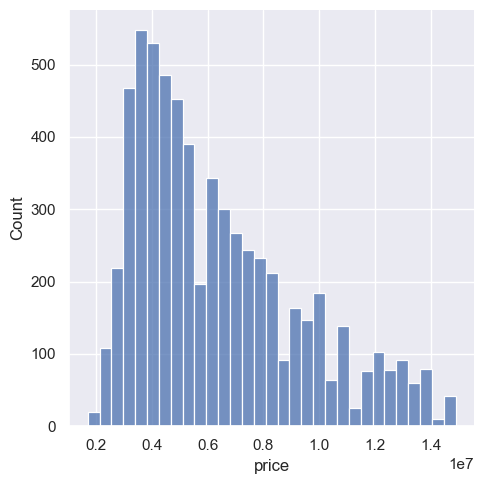

In [10]:
sns.displot(data_1['price'])

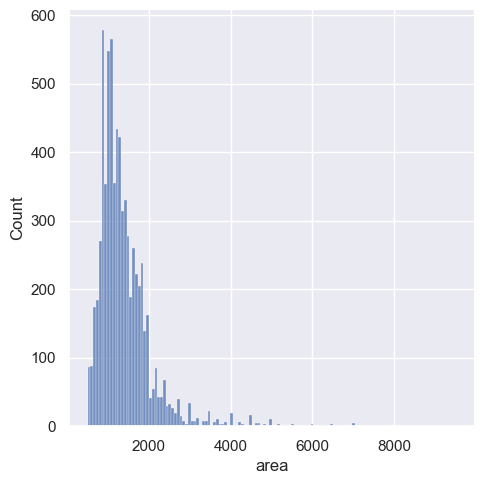

In [11]:
sns.displot(data_no_mv['area'])

In [12]:
q = data_1['area'].quantile(0.99)
data_2 = data_1[data_1['area']<q]

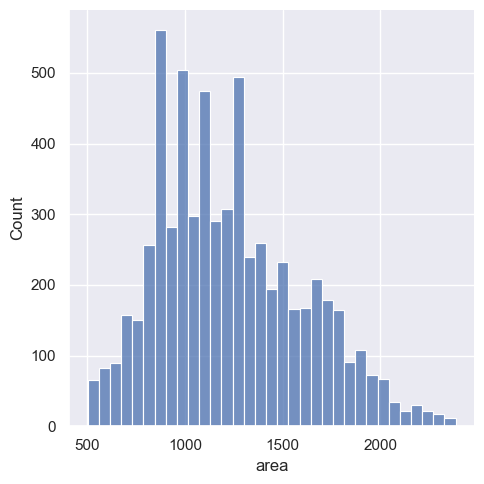

In [13]:
sns.displot(data_2['area'])

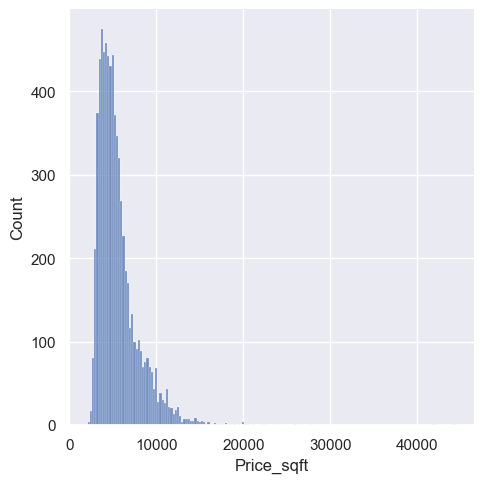

In [14]:
sns.displot(data_no_mv['Price_sqft'])

In [15]:
# data_3 = data_2[data_2['Price_sqft']<]
q = data_2['Price_sqft'].quantile(0.98)
data_3 = data_2[data_2['Price_sqft']<q]

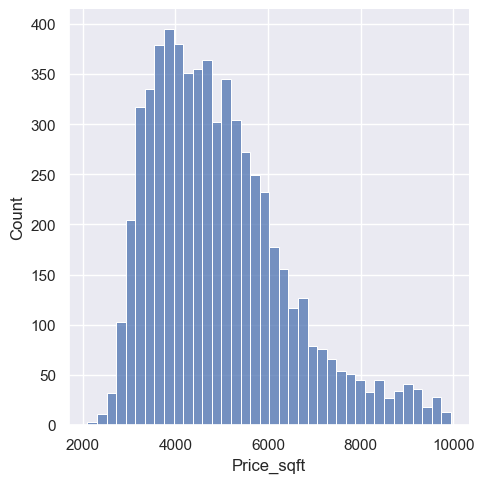

In [16]:
sns.displot(data_3['Price_sqft'])

In [17]:
data_cleaned = data_3.reset_index(drop=True)

In [18]:
data_cleaned.describe(include='all')

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Lift,type_of_building,Price_sqft
count,6.156000e+03,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156.000000,6156,6156,6156.000000,6156.000000,6156,6156.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ready to Move,Resale,NaN,NaN,Flat,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6146,5573,NaN,NaN,4959,NaN
mean,6.169090e+06,1234.520630,28.561049,77.295036,2.543535,2.312053,1.547271,NaN,NaN,2.681936,0.385640,NaN,4946.334883
std,2.788947e+06,371.063757,0.105952,0.176421,0.661010,0.571961,1.382215,NaN,NaN,35.875938,0.925537,NaN,1464.938571
min,1.700000e+06,501.000000,28.240023,76.902820,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,2100.000000
25%,4.000000e+06,950.000000,28.473245,77.104420,2.000000,2.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,3827.252599
50%,5.500000e+06,1180.000000,28.586965,77.358302,2.000000,2.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN,4695.243927
75%,7.800000e+06,1490.000000,28.645282,77.426425,3.000000,3.000000,3.000000,NaN,NaN,1.000000,0.000000,NaN,5739.533011


## Checking the OLS assumptions

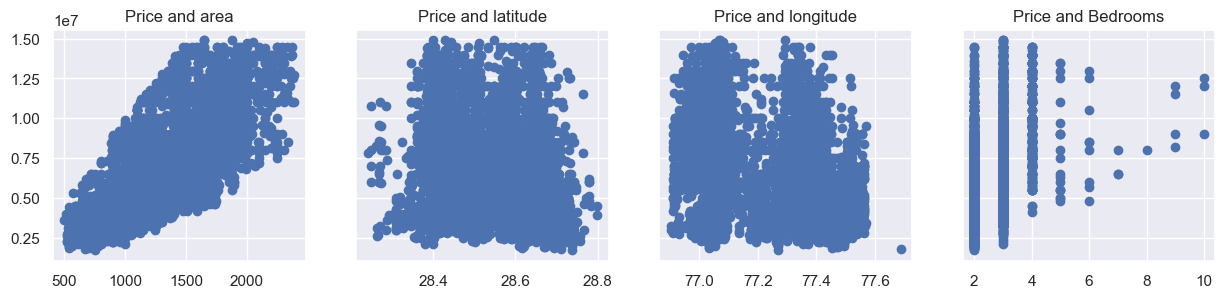

In [19]:
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['area'],data_cleaned['price'])
ax1.set_title('Price and area')
ax2.scatter(data_cleaned['latitude'],data_cleaned['price'])
ax2.set_title('Price and latitude')
ax3.scatter(data_cleaned['longitude'],data_cleaned['price'])
ax3.set_title('Price and longitude')
ax4.scatter(data_cleaned['Bedrooms'],data_cleaned['price'])
ax4.set_title('Price and Bedrooms')

plt.show()

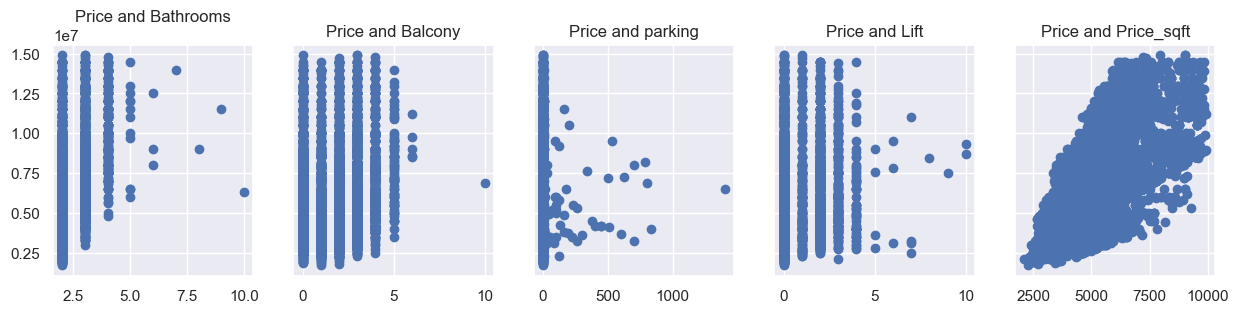

In [20]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3))
ax1.scatter(data_cleaned['Bathrooms'],data_cleaned['price'])
ax1.set_title('Price and Bathrooms')
ax2.scatter(data_cleaned['Balcony'],data_cleaned['price'])
ax2.set_title('Price and Balcony')
ax3.scatter(data_cleaned['parking'],data_cleaned['price'])
ax3.set_title('Price and parking')
ax4.scatter(data_cleaned['Lift'],data_cleaned['price'])
ax4.set_title('Price and Lift')
ax5.scatter(data_cleaned['Price_sqft'],data_cleaned['price'])
ax5.set_title('Price and Price_sqft')

plt.show()

### Multicollinearity

In [21]:
data_cleaned.columns.values

array(['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Balcony', 'Status', 'neworold', 'parking', 'Lift',
       'type_of_building', 'Price_sqft'], dtype=object)

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = data_cleaned[['area','Price_sqft']]

vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [23]:
vif

,VIF,Features
0,7.174635,area
1,7.174635,Price_sqft


In [24]:
data_no_multicollinearity = data_cleaned.copy()

## Create dummy variables

In [25]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [26]:
data_with_dummies.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft,Status_Under Construction,neworold_Resale,type_of_building_Individual House
0,5600000,1350,28.608850,77.460560,3,3,0.0,0.0,2.0,4148.148148,1,0,0
1,8800000,1490,28.374236,76.952416,3,3,0.0,0.0,2.0,5906.040268,0,0,0
2,6200000,1350,28.520732,77.356491,2,2,3.0,1.0,3.0,4592.592593,0,1,0
3,3700000,1150,28.628040,77.437809,2,2,3.0,0.0,0.0,3217.391304,0,0,0
4,3270000,890,28.610645,77.455837,2,2,3.0,1.0,2.0,3674.157303,0,1,0


### Rearrange a bit

In [27]:
data_with_dummies.columns.values

array(['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Balcony', 'parking', 'Lift', 'Price_sqft',
       'Status_Under Construction', 'neworold_Resale',
       'type_of_building_Individual House'], dtype=object)

In [28]:
cols = ['price', 'area', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms',
       'Balcony', 'parking', 'Lift', 'Price_sqft',
       'Status_Under Construction', 'neworold_Resale',
       'type_of_building_Individual House']

In [29]:
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft,Status_Under Construction,neworold_Resale,type_of_building_Individual House
0,5600000,1350,28.608850,77.460560,3,3,0.0,0.0,2.0,4148.148148,1,0,0
1,8800000,1490,28.374236,76.952416,3,3,0.0,0.0,2.0,5906.040268,0,0,0
2,6200000,1350,28.520732,77.356491,2,2,3.0,1.0,3.0,4592.592593,0,1,0
3,3700000,1150,28.628040,77.437809,2,2,3.0,0.0,0.0,3217.391304,0,0,0
4,3270000,890,28.610645,77.455837,2,2,3.0,1.0,2.0,3674.157303,0,1,0


## Linear regression model

### Declare the inputs and the targets

In [30]:
targets = data_preprocessed['price']
want_to_drop = ['price']
inputs = data_preprocessed.drop(want_to_drop,axis=1)
print(inputs)

      area   latitude  longitude  Bedrooms  Bathrooms  Balcony  parking  Lift  \
0     1350  28.608850  77.460560         3          3      0.0      0.0   2.0   
1     1490  28.374236  76.952416         3          3      0.0      0.0   2.0   
2     1350  28.520732  77.356491         2          2      3.0      1.0   3.0   
3     1150  28.628040  77.437809         2          2      3.0      0.0   0.0   
4      890  28.610645  77.455837         2          2      3.0      1.0   2.0   
...    ...        ...        ...       ...        ...      ...      ...   ...   
6151  1045  28.509208  77.406626         2          2      4.0      1.0   2.0   
6152  1095  28.635272  77.370395         2          2      0.0      0.0   0.0   
6153  1898  28.625850  77.435336         4          3      5.0      0.0   0.0   
6154  1400  28.701622  77.430153         3          3      2.0      1.0   3.0   
6155  1750  28.693590  77.344376         3          2      3.0      0.0   0.0   

       Price_sqft  Status_U

### Scale the data

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler()

In [32]:
inputs_scaled = scaler.transform(inputs)

### Train Test Split

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

### Create the regression

In [34]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [35]:
y_hat = reg.predict(x_train)

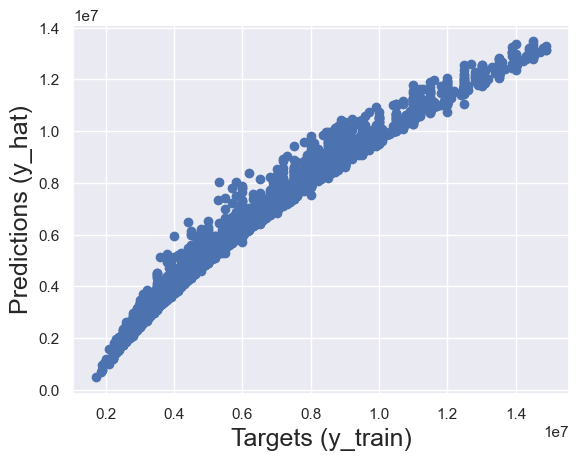

In [36]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

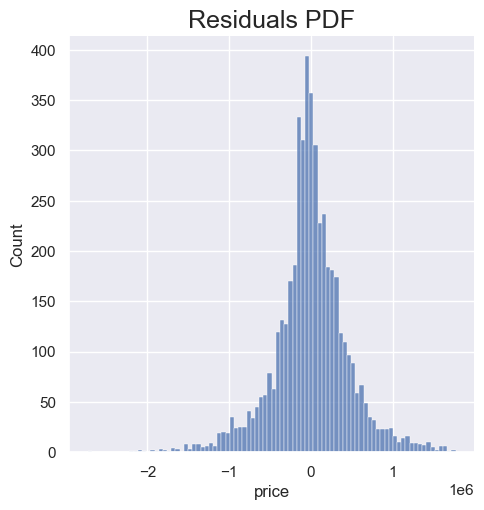

In [37]:
sns.displot(y_train - y_hat)

plt.title("Residuals PDF", size=18)


In [38]:
print(reg.score(x_train,y_train))

def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2
print(adj_r2(x_train,y_train))

0.9726613856660286
0.9725945839205576


In [39]:
# 'price', 'area', 'Price_sqft','Status_Under Construction', 'neworold_Resale','type_of_building_Individual House' ==> r2 = 0.972, adj_r2 = 0.972
# 'price', 'area', 'Price_sqft' ==> r2 = 0.972, adj_r2 = 0.972
# 'price', 'area', 'Price_sqft', 'latitude', 'longitude', 'Bedrooms', 'Bathrooms','Balcony', 'parking', 'Lift' ==> r2 = 9.73 dan adj_r2 = 9.73
# semua variabel selain price jadi inputs ==> r2 = 0.973, adj_r2 = 0.973
# r2 dan adj_r2 hampir sama semua karena weight nya area dan price_sqft sangat besar dibanding variabel lain.

### Finding the weights and bias

In [40]:
reg.intercept_

6167992.273121291

In [41]:
reg.coef_

array([1912847.24543043,   11219.72745011,  -52343.46028366,
        -57808.19371435,   41047.01480573,    4638.69296213,
         -3399.72433858,   12080.87162119, 1753182.57252227,
          6705.69476909,    8360.58833639,   18117.48704587])

In [42]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,area,1.912847e+06
1,latitude,1.121973e+04
2,longitude,-5.234346e+04
3,Bedrooms,-5.780819e+04
4,Bathrooms,4.104701e+04
5,Balcony,4.638693e+03
6,parking,-3.399724e+03
7,Lift,1.208087e+04
8,Price_sqft,1.753183e+06
9,Status_Under Construction,6.705695e+03


## Testing

In [43]:
y_hat_test = reg.predict(x_test)

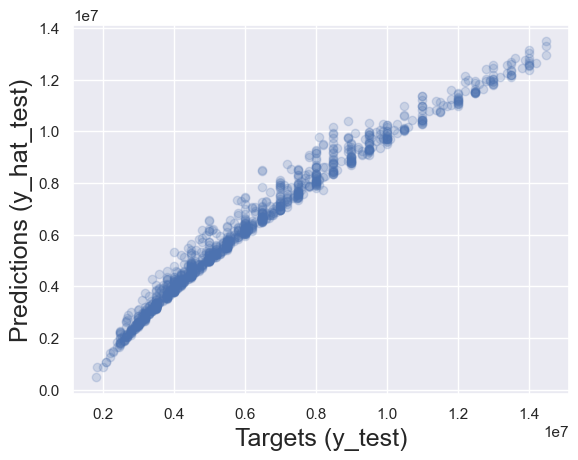

In [44]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.show()

In [47]:
y_test = y_test.reset_index(drop=True)

y_test.head()

0     9500000
1     9000000
2    12000000
3     4280000
4     4120000
Name: price, dtype: int64